# Week 10 Case Study Rain Prediction

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Data understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.shape

(145460, 23)

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.Date = df.Date.apply(pd.to_datetime)  #as date is an object, converting to date structure

In [9]:
df['month'] = df.Date.apply(lambda x: x.month)
df['day'] = df.Date.apply(lambda x: x.day)
df['year'] = df.Date.apply(lambda x: x.year)
df.drop(['Date'], 1, inplace = True)

In [10]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,day,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,12,3,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,12,4,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008


In [11]:
for i in df.columns:   #checking for categorical variables,we need categorize them with label encoder
    if df[i].nunique()<=20 and df[i].dtype not in ['int64', 'float64']:
        print ("\t" , i)
        print (df[i].value_counts())
        print("-"*20)

	 WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64
--------------------
	 WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64
--------------------
	 WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64
--------------------
	 RainToday
No     110319
Yes     31880
Name: RainToday, dtype: int64
--------------------
	 RainTomorrow
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64
--------------------


### Data Preparation

#### Imputation of Null values

In [12]:
from sklearn.impute import SimpleImputer

For numerical variables, mean and median imputation methods will be utilized.

In [13]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
median_imputer =SimpleImputer(missing_values = np.nan, strategy = 'median')

In [14]:
df[['Cloud3pm']] = median_imputer.fit_transform(df[['Cloud3pm']])
df[['Evaporation']] = median_imputer.fit_transform(df[['Evaporation']])

In [15]:
df[['Sunshine']] = mean_imputer.fit_transform(df[['Sunshine']])
df[['Cloud9am']] = mean_imputer.fit_transform(df[['Cloud9am']])
df[['Pressure9am']] = mean_imputer.fit_transform(df[['Pressure9am']])
df[['Pressure3pm']] = mean_imputer.fit_transform(df[['Pressure3pm']])

In [16]:
df.isnull().sum()   #checking nulls again

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
month                0
day                  0
year                 0
dtype: int64

As we imputed important columns' NANs, we can drop unnecessary ones.

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum() 

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
month            0
day              0
year             0
dtype: int64

In [19]:
#Encoding categorical variables with Label Encoder 
from sklearn.preprocessing import LabelEncoder

In [20]:
for col in df.columns:
    if df[col].dtype=='object':  
        encoder = LabelEncoder()
        encoder.fit(list(df[col].values))
        df[col] = encoder.transform(df[col].values)

In [21]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,day,year
0,1,13.4,22.9,0.6,4.8,7.611178,13,44.0,13,14,...,1007.1,8.000000,5.0,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.1,0.0,4.8,7.611178,14,44.0,6,15,...,1007.8,4.447461,5.0,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.7,0.0,4.8,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.0,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.0,0.0,4.8,7.611178,4,24.0,9,0,...,1012.8,4.447461,5.0,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.3,1.0,4.8,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.0,17.8,29.7,0,0,12,5,2008


### Checking for outliers 

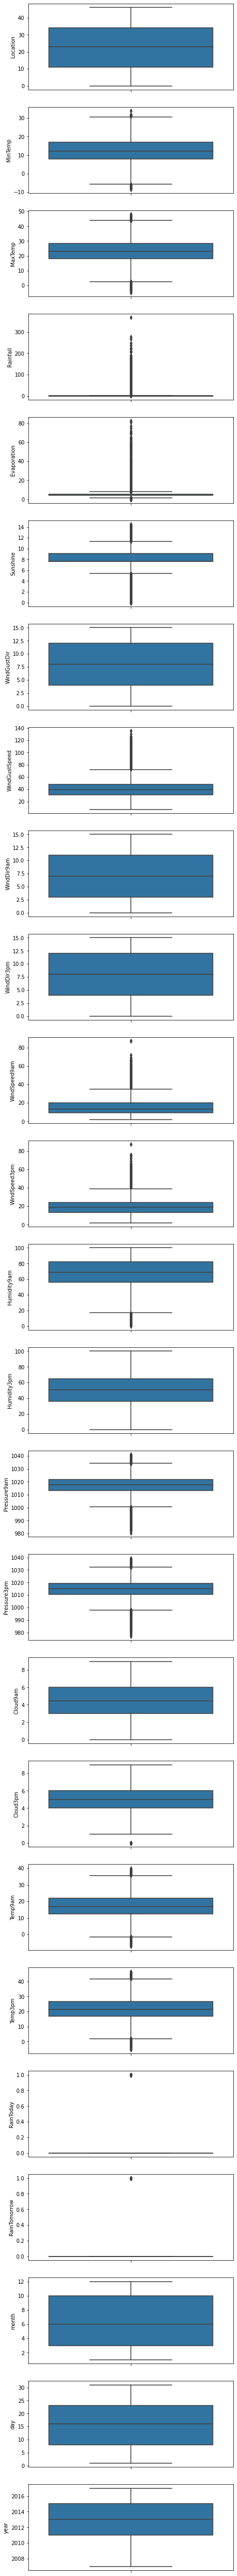

In [22]:
import seaborn as sns
column_list=df.columns
fig, axes=plt.subplots(nrows=len(column_list), figsize=(7,90))
for i in range (len(column_list)):
    sns.boxplot(ax=axes[i],y=column_list[i], data=df)

We see that there are significant outliers in some columns, but they are removed, we can lose the data with rained case which is not desirable for our prediction model.

In [23]:
df.shape

(121790, 25)

In [24]:
#### Checking the balance in the target

In [25]:
from collections import Counter
tg_column=df['RainTomorrow']
class_counter = Counter(tg_column)
for i, j in class_counter.items():
    per = j / len(tg_column) * 100
    print("Rain state:",i," Count:", j, "Percent of total:", round(per),"%")
scale=df[df["RainTomorrow"]==False]["RainTomorrow"].count()/df[df["RainTomorrow"]==True]["RainTomorrow"].count()
print("Scale: ", scale)

Rain state: 0  Count: 94906 Percent of total: 78 %
Rain state: 1  Count: 26884 Percent of total: 22 %
Scale:  3.530203838714477


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

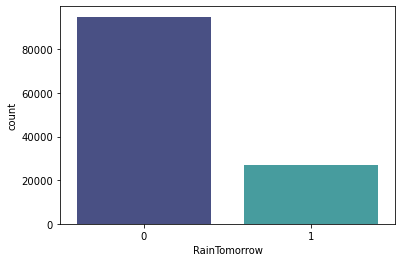

In [26]:
# look at the distribution of target  visually
import seaborn as sns
sns.countplot(x="RainTomorrow", data=df, palette="mako")

In [27]:
df.RainTomorrow.value_counts()

0    94906
1    26884
Name: RainTomorrow, dtype: int64

We see that there is target imbalance , we will resample it in order to increase the data for rained case.

In [28]:
from sklearn.utils import resample

In [29]:
not_rained  = df[df['RainTomorrow']==0]   
rained = df[df['RainTomorrow']==1]  

In [30]:
rained_resample = resample(rained, replace = True, n_samples = 94000) 
#concatenate
df = pd.concat([not_rained,rained_resample])

In [31]:
df.RainTomorrow.value_counts()

0    94906
1    94000
Name: RainTomorrow, dtype: int64

In [32]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,day,year
0,1,13.4,22.9,0.6,4.8,7.611178,13,44.0,13,14,...,1007.1,8.000000,5.0,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.1,0.0,4.8,7.611178,14,44.0,6,15,...,1007.8,4.447461,5.0,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.7,0.0,4.8,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.0,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.0,0.0,4.8,7.611178,4,24.0,9,0,...,1012.8,4.447461,5.0,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.3,1.0,4.8,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.0,17.8,29.7,0,0,12,5,2008


In [33]:
from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

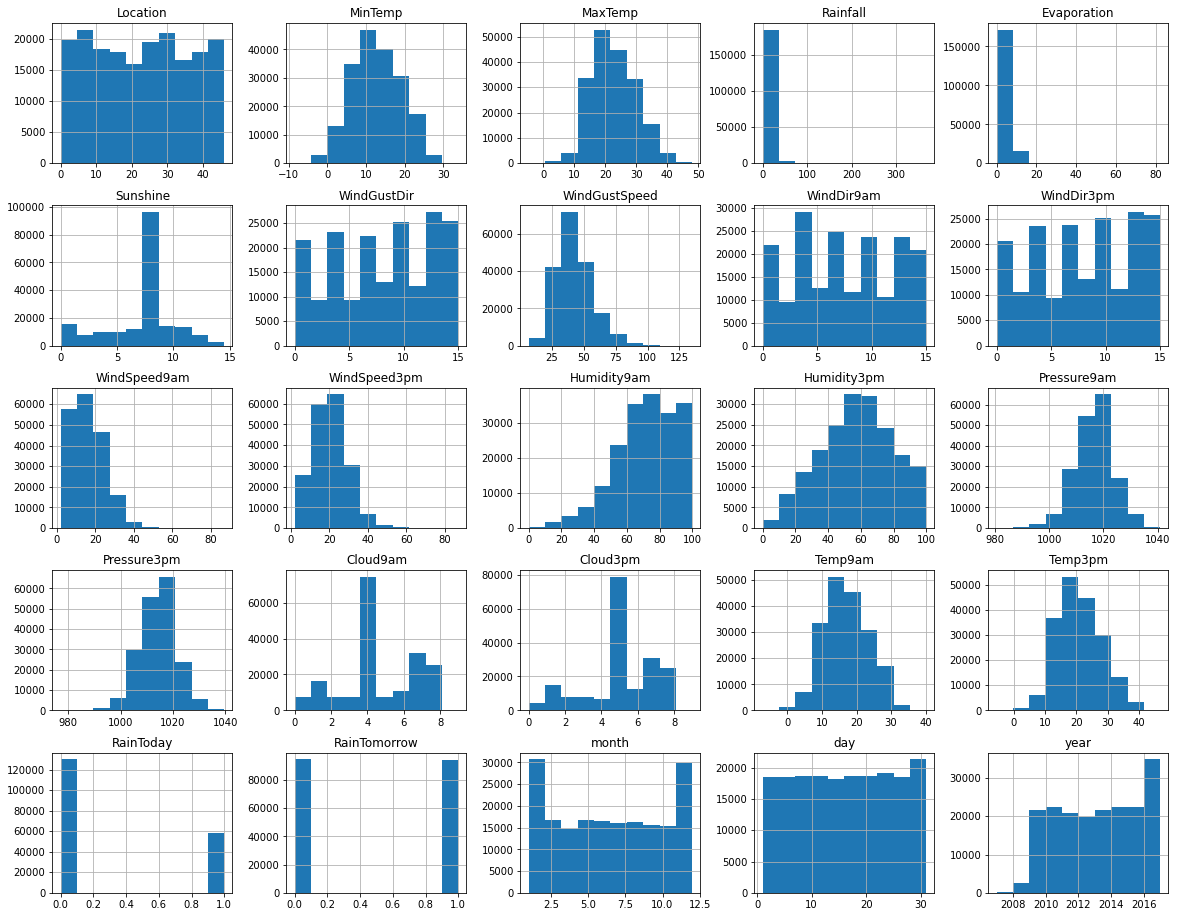

In [34]:
#checking the distribution of data again
df.hist(figsize=(20,16));
plt.show();

In [35]:
#info value of variables for prediction target
df.corr().abs()['RainTomorrow'].sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.519096
Sunshine         0.386168
Cloud3pm         0.372079
RainToday        0.339972
Humidity9am      0.334401
Cloud9am         0.317475
Pressure9am      0.272159
WindGustSpeed    0.262544
Pressure3pm      0.250470
Temp3pm          0.240266
Rainfall         0.221073
MaxTemp          0.200959
Evaporation      0.122180
WindSpeed3pm     0.111998
WindSpeed9am     0.107612
MinTemp          0.093931
WindGustDir      0.058136
Temp9am          0.044235
WindDir9am       0.033123
WindDir3pm       0.025218
year             0.018566
month            0.007842
day              0.007709
Location         0.004165
Name: RainTomorrow, dtype: float64

## Data Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# separating the features and target
X = df.drop(columns=['RainTomorrow'],axis=1)
Y = df['RainTomorrow']

In [38]:
print(X)

        Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
96289         37     16.0     27.0       0.0          5.0   7.611178   
107342        46     26.2     44.9       0.8         22.2   7.611178   
18614         24     12.2     19.9       0.0          4.8   7.611178   
73689         23     13.8     26.8       0.0          4.8   7.611178   
100279        21      6.8     32.8       0.0          4.8   9.300000   
...          ...      ...      ...       ...          ...        ...   
9744          10     17.6     21.2       4.4          3.2   0.000000   
2780           1      8.3     20.9       0.0          4.8   7.611178   
88308          7     23.1     31.3       0.0          6.2  10.800000   
133006        14      6.5     14.6       0.0          1.6   5.100000   
31354         35     12.1     18.8       0.0          6.6   3.900000   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
96289             4           28.0          13         

In [39]:
print(Y)

96289     0
107342    1
18614     0
73689     0
100279    0
         ..
9744      1
2780      1
88308     1
133006    0
31354     1
Name: RainTomorrow, Length: 188906, dtype: int64


In [40]:
scaler=StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [41]:
new_df = pd.DataFrame(standardized_data, columns=X.columns, index=df.index)

In [42]:
X = new_df
Y = df['RainTomorrow']  # outcome does not need standardazition as it is in range  [0, 1]

#### Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=101)

## Modelling

In [44]:
import torch
X_train=torch.from_numpy(X_train.values).float()

In [45]:
X_test=torch.from_numpy(X_test.values).float()
Y_train=torch.from_numpy(Y_train.values).float()
Y_test=torch.from_numpy(Y_test.values).float()

In [46]:
Y_train = Y_train.type(torch.LongTensor)

In [47]:
Y_test = Y_test.type(torch.LongTensor)

In [48]:
from torch.utils.data import TensorDataset, DataLoader

In [49]:
train_dt=TensorDataset(X_train, Y_train)
test_dt=TensorDataset(X_test, Y_test)

In [50]:
train_data_loader=DataLoader(train_dt, batch_size=64, shuffle=True)
test_data_loader=DataLoader(test_dt, batch_size=64, shuffle=True)

In [51]:
from torch import nn

In [62]:
df.shape

(188906, 25)

In [63]:
# Defining the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(24, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid())
    def forward(self, x):
        return self.model(x)

In [64]:
model=NeuralNetwork()
print(model)

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=24, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [65]:
loss_fn=nn.BCELoss()

In [66]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [67]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X.float())
        y=y.unsqueeze(1).float()
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [68]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.float())
            y=y.unsqueeze(1).float()
            test_loss += loss_fn(pred, y).item()
            correct += (pred.ge(0.5) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [69]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_data_loader, model, loss_fn, optimizer)
    test(test_data_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.701324  [    0/132234]
loss: 0.687877  [ 6400/132234]
loss: 0.668470  [12800/132234]
loss: 0.644206  [19200/132234]
loss: 0.633842  [25600/132234]
loss: 0.640855  [32000/132234]
loss: 0.620875  [38400/132234]
loss: 0.623736  [44800/132234]
loss: 0.599996  [51200/132234]
loss: 0.602848  [57600/132234]
loss: 0.594662  [64000/132234]
loss: 0.553485  [70400/132234]
loss: 0.554675  [76800/132234]
loss: 0.560361  [83200/132234]
loss: 0.566744  [89600/132234]
loss: 0.526334  [96000/132234]
loss: 0.508272  [102400/132234]
loss: 0.544299  [108800/132234]
loss: 0.545503  [115200/132234]
loss: 0.530769  [121600/132234]
loss: 0.462946  [128000/132234]
Test Error: 
 Accuracy: 76.3%, Avg loss: 0.008046 

Epoch 2
-------------------------------
loss: 0.521775  [    0/132234]
loss: 0.504081  [ 6400/132234]
loss: 0.534341  [12800/132234]
loss: 0.465679  [19200/132234]
loss: 0.524896  [25600/132234]
loss: 0.572678  [32000/132234]
loss: 0.477532  [38400/132